In [1]:
# Import packages
import os
import glob

import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

import numpy as np
import rasterio
import xarray
import netCDF4
import scipy

In [23]:
io = netCDF4, h5netcdf, scipy, pydap, zarr, fsspec, cftime, rasterio, cfgrib, pooch 

conda install -c anaconda netcdf4 h5netcdf scipy pydap zarr fsspec cftime rasterio cfgrib pooch

SyntaxError: invalid syntax (3158950081.py, line 3)

In [165]:
# Define filepath
filepath = 'C:/Users/sshul/Documents/GitHub/geospatial-data-science/labs/lab4/'

# Define list of Landsat bands
files = sorted(glob.glob(filepath + 'landsat/*.tif'))
print(files)

['C:/Users/sshul/Documents/GitHub/geospatial-data-science/labs/lab4/landsat\\LC08_L2SP_047029_20200814_20210330_02_T1_SR_B1.tif', 'C:/Users/sshul/Documents/GitHub/geospatial-data-science/labs/lab4/landsat\\LC08_L2SP_047029_20200814_20210330_02_T1_SR_B2.tif', 'C:/Users/sshul/Documents/GitHub/geospatial-data-science/labs/lab4/landsat\\LC08_L2SP_047029_20200814_20210330_02_T1_SR_B3.tif', 'C:/Users/sshul/Documents/GitHub/geospatial-data-science/labs/lab4/landsat\\LC08_L2SP_047029_20200814_20210330_02_T1_SR_B4.tif', 'C:/Users/sshul/Documents/GitHub/geospatial-data-science/labs/lab4/landsat\\LC08_L2SP_047029_20200814_20210330_02_T1_SR_B5.tif', 'C:/Users/sshul/Documents/GitHub/geospatial-data-science/labs/lab4/landsat\\LC08_L2SP_047029_20200814_20210330_02_T1_SR_B6.tif', 'C:/Users/sshul/Documents/GitHub/geospatial-data-science/labs/lab4/landsat\\LC08_L2SP_047029_20200814_20210330_02_T1_SR_B7.tif', 'C:/Users/sshul/Documents/GitHub/geospatial-data-science/labs/lab4/landsat\\rgb.tif']


In [166]:
# Open a single band
src = rasterio.open(files[0])
band_1 = src.read(1)

In [167]:
# Open a single band
src = rasterio.open(files[0])
band_1 = src.read(1)

# Get corners of dataset
full_extent = [src.bounds.left, src.bounds.right, src.bounds.bottom, src.bounds.top]
print(full_extent)

[391695.0, 427935.0, 4837905.0, 4880565.0]


In [168]:
# Open all bands in a loop
list_bands = []
for file in files:
    # Read band
    src = rasterio.open(file)
    band = src.read(1)
    
    # Append to list
    list_bands.append(band)

# Convert from list of arrays to n-dimensional array
all_bands = np.dstack(list_bands)

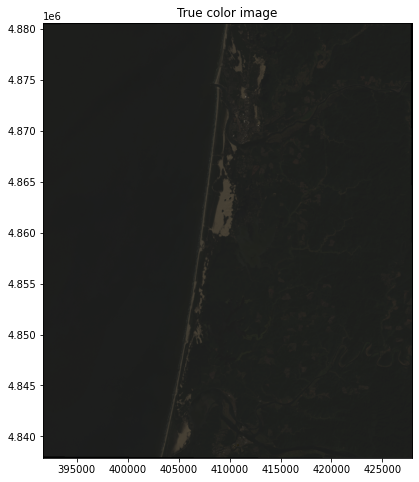

In [169]:
# Convert values to a range of 0-255
all_bands_image = np.uint8((all_bands / 65536) * 255)
# Produce a new array by stacking the RGB bands
rgb = np.dstack((all_bands_image[:,:,3],all_bands_image[:,:,2],all_bands_image[:,:,1]))

# Plot as RGB image
fig, ax = plt.subplots(figsize=(8,8))
im = ax.imshow(rgb, extent=full_extent)
ax.set_title("True color image")
plt.show()

**Question One**

In [5]:
# Read data
xds = xarray.open_dataset(filepath + 'era/usa_t2m_tcc_2020.nc', decode_coords='all')

In [6]:
xds

<xarray.Dataset>
Dimensions:    (longitude: 233, latitude: 99, time: 1464)
Coordinates:
  * longitude  (longitude) float32 -125.0 -124.8 -124.5 ... -67.5 -67.25 -67.0
  * latitude   (latitude) float32 49.24 48.99 48.74 48.49 ... 25.24 24.99 24.74
  * time       (time) datetime64[ns] 2020-01-01 ... 2020-12-31T18:00:00
Data variables:
    t2m        (time, latitude, longitude) float32 ...
    tcc        (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2022-01-05 17:55:44 GMT by grib_to_netcdf-2.23.0: /opt/ecmw...

In [7]:
# Print the time period of the data
print('The data ranges from %s to %s' %(xds['t2m']['time'].values.min(), xds['t2m']['time'].values.max()))

The data ranges from 2020-01-01T00:00:00.000000000 to 2020-12-31T18:00:00.000000000


In [8]:
xds_daily = xds.resample(time='1D').mean()
xds_daily

<xarray.Dataset>
Dimensions:    (time: 366, longitude: 233, latitude: 99)
Coordinates:
  * time       (time) datetime64[ns] 2020-01-01 2020-01-02 ... 2020-12-31
  * longitude  (longitude) float32 -125.0 -124.8 -124.5 ... -67.5 -67.25 -67.0
  * latitude   (latitude) float32 49.24 48.99 48.74 48.49 ... 25.24 24.99 24.74
Data variables:
    t2m        (time, latitude, longitude) float32 280.6 281.4 ... 296.3 296.2
    tcc        (time, latitude, longitude) float32 0.9765 0.8814 ... 0.2124

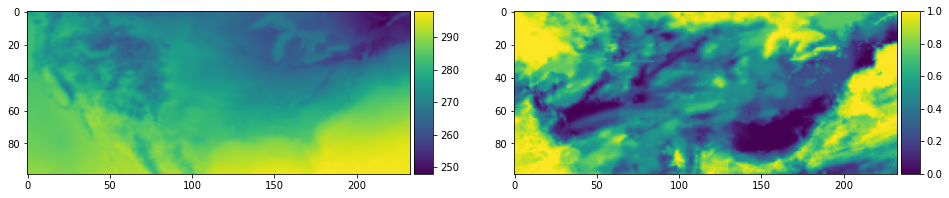

In [17]:
# Plot data
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16,6))
im1 = ax1.imshow(xds_daily['t2m'][45,:,:])
divider = make_axes_locatable(ax1)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im1, cax=cax, orientation='vertical')

im2 = ax2.imshow(xds_daily['tcc'][45,:,:])
divider = make_axes_locatable(ax2)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im2, cax=cax, orientation='vertical')

In [15]:
# Next, find the index of the grid point nearest a specific lat/lon.   
florence_weather = xds_daily.sel(latitude=43.974659, longitude=-124.103142, method='nearest')

In [16]:
# Note: Aug 14 is DOY 226
print('Cloud cover in Florence on January 31, 2020 = %.2f %%' % (florence_weather['tcc'][30].values * 100))
print('Cloud cover in Florence on February 15, 2020 = %.2f %%' % (florence_weather['tcc'][45].values * 100))

Cloud cover in Florence on January 31, 2020 = 99.98 %
Cloud cover in Florence on February 15, 2020 = 100.00 %


In [18]:
fahrenheit = (florence_weather['t2m'][30].values - 273.15) * 9/5 + 32
print('Air temperature in Florence on January 31, 2020 = %.2f F' % (fahrenheit))

fahrenheit = (florence_weather['t2m'][45].values - 273.15) * 9/5 + 32
print('Air temperature in Florence on February 15, 2020 = %.2f F' % (fahrenheit))

Air temperature in Florence on January 31, 2020 = 53.82 F
Air temperature in Florence on February 15, 2020 = 45.76 F


**Question Two**

In [109]:
temp_mean = xds_daily['t2m'].mean(dim = 'time')
max_temp_mean = temp_mean.argmax()
max_temp_mean

<xarray.DataArray 't2m' ()>
array(18928, dtype=int64)

In [111]:
max_temp_meanloc = np.unravel_index(max_temp_mean, xds_daily['t2m'].shape)
max_temp_meanloc

(0, 81, 55)

In [112]:
temp_mean[81, 55]

<xarray.DataArray 't2m' ()>
array(299.2989, dtype=float32)
Coordinates:
    longitude  float32 -111.2
    latitude   float32 28.99

In [113]:
print('The highest average air temperature is in Hermosillo, Mexico.')

The highest average air temperature is in Hermosillo, Mexico


In [114]:
min_temp_mean = temp_mean.argmin()
min_temp_mean

<xarray.DataArray 't2m' ()>
array(4954, dtype=int64)

In [115]:
min_temp_meanloc = np.unravel_index(min_temp_mean, xds_daily['t2m'].shape)
min_temp_meanloc

(0, 21, 61)

In [116]:
temp_mean[21,61]

<xarray.DataArray 't2m' ()>
array(271.5829, dtype=float32)
Coordinates:
    longitude  float32 -109.8
    latitude   float32 43.99

In [117]:
print('The lowest average air temperature is in Meeteetse, Wyoming USA')

The lowest average air temperature is in Meeteetse, Wyoming USA


In [118]:
xds_ymean = xds.resample(time = '1y').mean() * 100

In [119]:
mean_cloud_cover = xds_daily['tcc'].mean(dim='time')

In [120]:
max_mean_cc = mean_cloud_cover.argmax()
max_mean_cc

<xarray.DataArray 'tcc' ()>
array(0, dtype=int64)

In [121]:
max_mean_ccloc = np.unravel_index(max_mean_cc, xds_daily['tcc'].shape)
max_mean_ccloc

(0, 0, 0)

In [122]:
mean_cloud_cover[0,0]

<xarray.DataArray 'tcc' ()>
array(0.77146894, dtype=float32)
Coordinates:
    longitude  float32 -125.0
    latitude   float32 49.24

In [123]:
print('The maximum average cloud cover is in Port Alberni, BC Canada.')

The maximum average cloud cover is in Port Alberni, BC Canada.


In [124]:
min_mean_cc = mean_cloud_cover.argmin()
min_mean_cc

<xarray.DataArray 'tcc' ()>
array(16584, dtype=int64)

In [142]:
min_mean_ccloc = np.unravel_index(min_mean_cc, xds_daily['tcc'].shape)
min_mean_ccloc

(0, 71, 41)

In [127]:
mean_cloud_cover[71, 41]

<xarray.DataArray 'tcc' ()>
array(0.16893195, dtype=float32)
Coordinates:
    longitude  float32 -114.8
    latitude   float32 31.49

In [131]:
print(f'The minimum average cloud cover is in the Gulf of California, off the \n coast of the Colorado River Delta Biosphere Reserve.')

The minimum average cloud cover is in the Gulf of California, off the 
 coast of the Colorado River Delta Biosphere Reserve.


In [132]:
daily_max = np.max(xds_daily['t2m'], axis = 0 )
daily_max

<xarray.DataArray 't2m' (latitude: 99, longitude: 233)>
array([[294.49335, 294.26083, 294.98743, ..., 293.40433, 293.88705,
        294.4807 ],
       [294.85352, 294.37445, 293.87637, ..., 294.7832 , 294.55133,
        294.73587],
       [292.5385 , 293.26373, 293.71115, ..., 300.5082 , 300.63113,
        299.97418],
       ...,
       [296.69775, 296.6911 , 296.75406, ..., 302.0663 , 302.0553 ,
        302.08466],
       [296.8783 , 296.93097, 296.95294, ..., 302.03665, 301.99136,
        302.025  ],
       [297.1285 , 297.12918, 297.1708 , ..., 301.992  , 301.9577 ,
        301.9667 ]], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 -125.0 -124.8 -124.5 ... -67.5 -67.25 -67.0
  * latitude   (latitude) float32 49.24 48.99 48.74 48.49 ... 25.24 24.99 24.74

In [133]:
daily_min = np.min(xds_daily['t2m'], axis = 0 )
daily_min

<xarray.DataArray 't2m' (latitude: 99, longitude: 233)>
array([[269.54614, 269.9083 , 268.75464, ..., 253.5631 , 254.69144,
        254.49556],
       [270.14514, 267.34943, 265.0641 , ..., 254.31932, 253.95721,
        253.46048],
       [272.68903, 270.9557 , 268.14398, ..., 252.37546, 251.43365,
        250.67844],
       ...,
       [288.39587, 288.3816 , 288.36526, ..., 293.44495, 293.47928,
        293.53958],
       [288.47852, 288.47052, 288.50317, ..., 293.71115, 293.74377,
        293.7921 ],
       [288.5628 , 288.55115, 288.5858 , ..., 293.9367 , 294.00064,
        294.00464]], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 -125.0 -124.8 -124.5 ... -67.5 -67.25 -67.0
  * latitude   (latitude) float32 49.24 48.99 48.74 48.49 ... 25.24 24.99 24.74

In [155]:
rang = (daily_max - daily_min)
max_range = rang.argmax()

In [156]:
max_rangeloc = np.unravel_index(max_range, xds_daily['t2m'].shape)
max_rangeloc

(0, 1, 210)

In [157]:
rang[1, 210]

<xarray.DataArray 't2m' ()>
array(57.7585, dtype=float32)
Coordinates:
    longitude  float32 -72.5
    latitude   float32 48.99

In [158]:
print('The maximum range at a single location is in Quebec, Canada.')

The maximum range at a single location is in Quebec, Canada.


In [159]:
abs_cold = np.min(xds_daily['t2m'], axis = 0)

In [161]:
abs_cold_min = abs_cold.argmin()
abs_cold_min

<xarray.DataArray 't2m' ()>
array(521, dtype=int64)

In [162]:
abs_coldloc = np.unravel_index(abs_cold_min, xds_daily['t2m'].shape)
abs_coldloc

(0, 2, 55)

In [163]:
abs_cold[2, 55]

<xarray.DataArray 't2m' ()>
array(241.72095, dtype=float32)
Coordinates:
    longitude  float32 -111.2
    latitude   float32 48.74

In [164]:
print('The absolute coldest temperature in one day is in Lothair, Montana USA.')

The absolute coldest temperature in one day is in Lothair, Montana USA.


**Question Three**

In [171]:
# Get all landsat bands

bands_list = []
for file in files:
    band = src.read(1)
    bands_list.append(band)
    
all_bands = np.dstack(list_bands) # create array

In [173]:
# Standardize values
all_bands_image = np.uint8((all_bands / 65536) * 255)

In [175]:
# Compute NDVI
np.seterr(divide='ignore', invalid='ignore')
ndvi = np.divide((all_bands[:,:,4].astype(float) - all_bands[:,:,3].astype(float)), \
                (all_bands[:,:,4].astype(float) + all_bands[:,:,3].astype(float)))

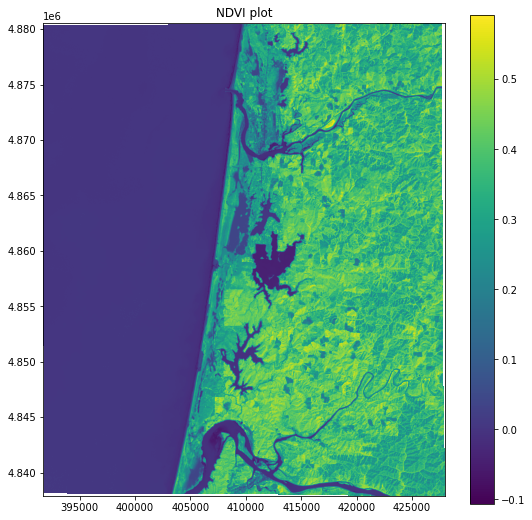

In [176]:
# Plot ndvi
fig, ax = plt.subplots(figsize=(9,9))
im = ax.imshow(ndvi, extent=full_extent)
ax.set_title('NDVI plot')
fig.colorbar(im, orientation='vertical')
plt.show()

In [177]:
# Recreate with rgb bands
rgb = np.dstack((all_bands_image[:,:,4], all_bands_image[:,:,3], all_bands_image[:,:,2]))


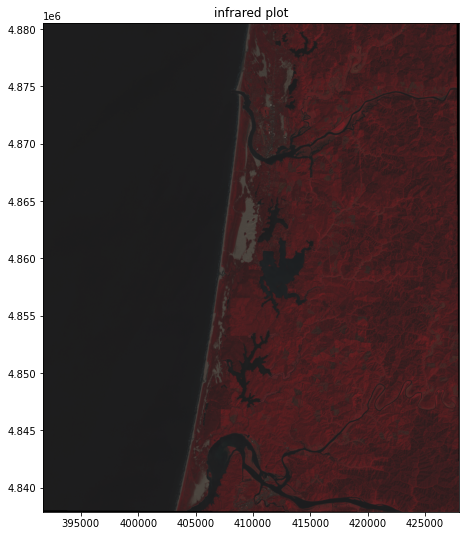

In [178]:
# Plot infrared
fig, ax = plt.subplots(figsize=(9,9))
im = ax.imshow(rgb, extent=full_extent)
ax.set_title("infrared plot")
plt.show()

**Messing Around**

In [34]:
for lat in xds_daily['latitude']:
    print(lat)
    for lon in xds_daily['longitude']:
        print(lon)
        #print(xds_daily[lat, lon])

TypeError: 'DataArray' object is not callable

In [80]:
counter = 0
average_dict = {}

while counter < 1:
    for latitude in xds_daily['latitude']:
        for longitude in xds_daily['longitude']:
            key = tuple((float(latitude), float(longitude)))
            if key not in average_dict.keys():
                average_dict[key] = 0
    counter += 1
            

In [100]:
timecounter = 0

for key in average_dict.keys():
    lat = list(average_dict.keys())[counter][0]
    lon = list(average_dict.keys())[counter][1]
    
    while timecounter < len(xds_daily['time']):
        value = xds_daily['t2m'][timecounter][lat][lon]
        xds_daily[tuple(lat, lon)] = (xds_daily[tuple(lat, lon)] + value)

KeyError: 0

In [90]:
list(average_dict.keys())[0][0]

49.2400016784668

In [94]:
counter = 1 
list(average_dict.keys())[counter][0]


49.2400016784668

In [99]:
lat = 49.2400016784668
lon = -124.75
average_dict[tuple((lat, lon))]

0

In [106]:
counter = 0
xds_daily['t2m'][counter][lat][lon]

TypeError: invalid indexer array, does not have integer dtype: array(49.24000168)